In [5]:
import pandas as pd

# Load the dataset
data_path = 'C:/Users/Blessing Austin/OneDrive - montclair.edu/Desktop/MSU/Semester 2/Machine Learning/PowerPlantsintheU_Export_TableToExcel.xlsx'  # Update this path to your actual dataset path
df = pd.read_excel(data_path)

# Display the first few rows to understand its structure
print(df.head())


   OBJECTID_1  OBJECTID  Plant_Code        Plant_Name  Utility_ID  \
0           1     13170        4068           Merrill       20860   
1           2     13171        4071     Potato Rapids       20860   
2           3     13172        4072           Pulliam       20860   
3           4     13173        4074  Sandstone Rapids       20860   
4           5     13174        4075          Tomahawk       20860   

                      Utility_Na        sector_nam              Street_Add  \
0  Wisconsin Public Service Corp  Electric Utility           306 S Park St   
1  Wisconsin Public Service Corp  Electric Utility  N4295 Potato Rapids Rd   
2  Wisconsin Public Service Corp  Electric Utility        1530 N Bylsby Av   
3  Wisconsin Public Service Corp  Electric Utility    N7633 Sandstone Lane   
4  Wisconsin Public Service Corp  Electric Utility     W6080 Pride Pond Rd   

                  City     County  ... NG_MW  Nuclear_MW Crude_MW Solar_MW  \
0              Merrill    Lincoln  ...

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12008 entries, 0 to 12007
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID_1  12008 non-null  int64  
 1   OBJECTID    12008 non-null  int64  
 2   Plant_Code  12008 non-null  int64  
 3   Plant_Name  12008 non-null  object 
 4   Utility_ID  12008 non-null  int64  
 5   Utility_Na  12008 non-null  object 
 6   sector_nam  12008 non-null  object 
 7   Street_Add  11947 non-null  object 
 8   City        12005 non-null  object 
 9   County      12008 non-null  object 
 10  State       12008 non-null  object 
 11  Zip         12008 non-null  int64  
 12  PrimSource  12008 non-null  object 
 13  source_des  12008 non-null  object 
 14  tech_desc   12008 non-null  object 
 15  Install_MW  12008 non-null  float64
 16  Total_MW    12008 non-null  float64
 17  Bat_MW      12008 non-null  float64
 18  Bio_MW      12008 non-null  float64
 19  Coal_MW     12008 non-nul

In [15]:
# selecting Coal, Hydro, and Wind power capacities
features = df[['Coal_MW', 'Hydro_MW', 'Solar_MW', 'Wind_MW']].copy()

# Check for missing values and decide how to handle them
print(features.isnull().sum())

Coal_MW     0
Hydro_MW    0
Solar_MW    0
Wind_MW     0
dtype: int64


In [17]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(features)

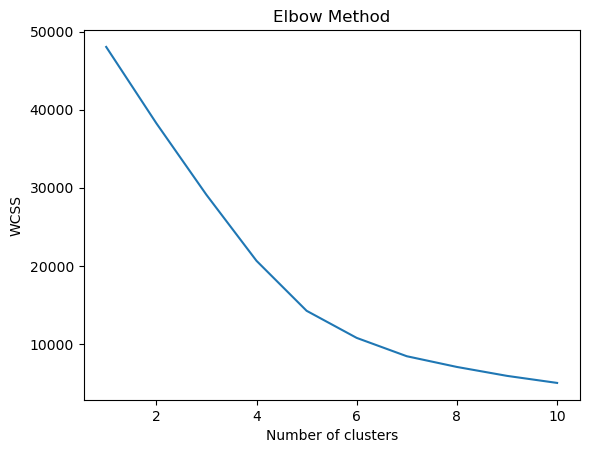

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaler)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [38]:
def run_kmeans(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    
    # Print out the centroids
    centroids = kmeans.cluster_centers_
    print(f"Centroids for {n_clusters} clusters:")
    print(centroids)
    
    # Return the labels to use them in further analysis if needed
    return cluster_labels

# Run KMeans for 3, 4, and 5 clusters
labels_4 = run_kmeans(4, scaler)
labels_5 = run_kmeans(5, scaler)

# You can now analyze the labels to see how your data points are grouped
# For example, to see the distribution of points in each cluster for k=3
print(f"Distribution for 3 clusters: {pd.Series(labels_3).value_counts()}")


Centroids for 4 clusters:
[[-7.89989912e-02  7.17392606e-03 -1.50264028e-01 -1.85244542e-01]
 [ 1.00382527e+01 -7.70338004e-02 -2.40820948e-01 -2.39437474e-01]
 [-1.03417844e-01 -7.70338004e-02 -2.42524986e-01  4.05407633e+00]
 [-1.03417844e-01 -7.70338004e-02  4.55189375e+00 -2.39437474e-01]]
Centroids for 5 clusters:
[[-7.99050744e-02 -9.09973446e-03 -1.50202875e-01 -1.85209987e-01]
 [-1.03417844e-01 -7.70338004e-02 -2.42524986e-01  4.05407633e+00]
 [ 9.93452384e+00 -7.70338004e-02 -2.40930080e-01 -2.39437474e-01]
 [-1.03417844e-01  3.57713061e+01 -2.46168445e-01 -2.39437474e-01]
 [-1.03417844e-01 -7.70338004e-02  4.55189375e+00 -2.39437474e-01]]
Distribution for 3 clusters: 0    11379
2      531
1       98
dtype: int64


C:\Users\Blessing Austin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


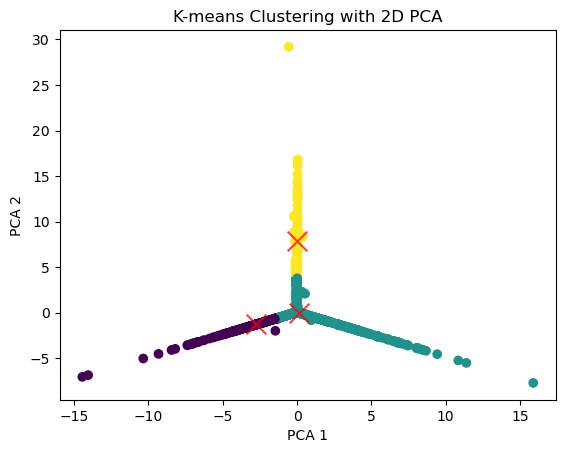

In [42]:
from sklearn.decomposition import PCA

# Reduce data to two dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaler)

# Run KMeans again on the reduced data
kmeans = KMeans(n_clusters=3)  # Change the number of clusters here to 4 or 5 as needed
reduced_labels = kmeans.fit_predict(reduced_data)

# Plot the results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=reduced_labels, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-means Clustering with 2D PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [41]:
df['cluster'] = labels_5

Text(0.5, 1.02, 'Pairplot of Features by Cluster')

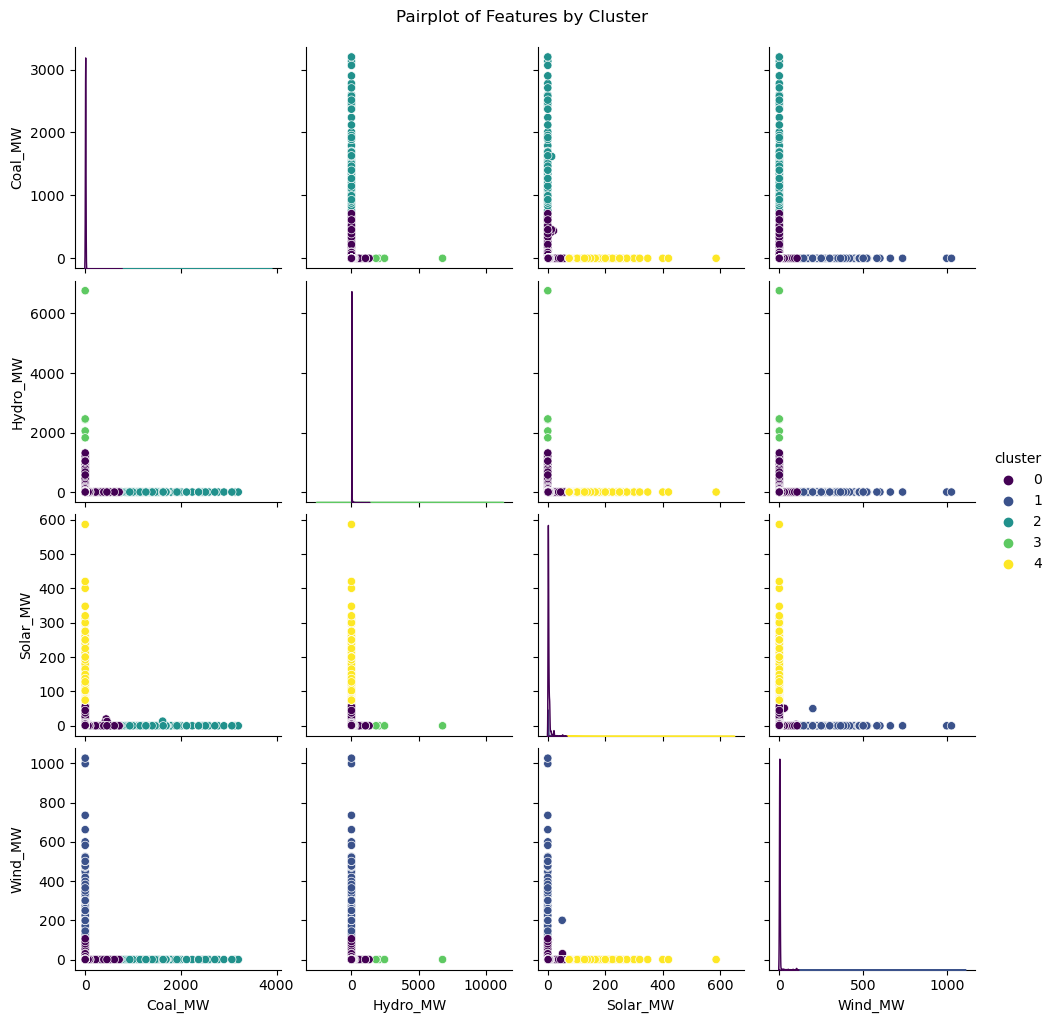

In [35]:
import seaborn as sns

# Pairplot for the selected features colored by cluster label
pairplot_fig = sns.pairplot(df, vars=['Coal_MW', 'Hydro_MW', 'Solar_MW', 'Wind_MW'], hue='cluster', palette='viridis')
pairplot_fig.fig.suptitle("Pairplot of Features by Cluster", y=1.02)  # Adjust the title position


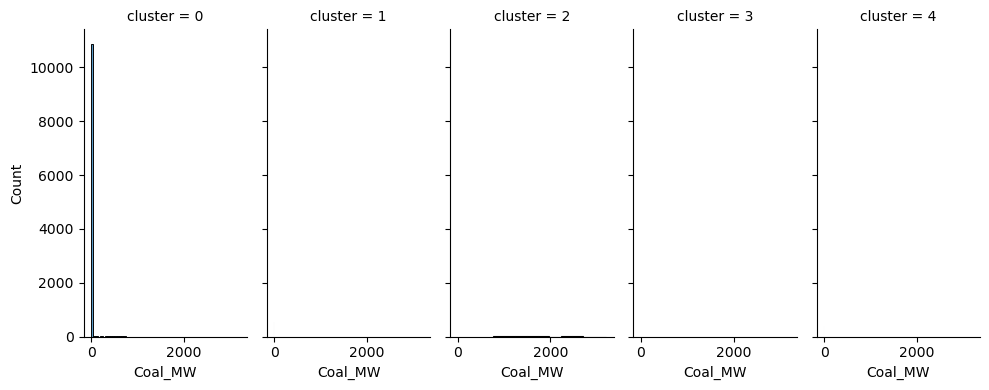

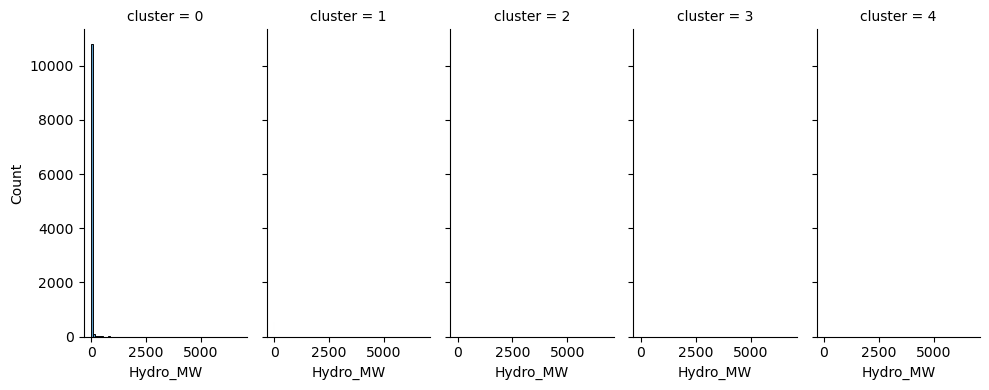

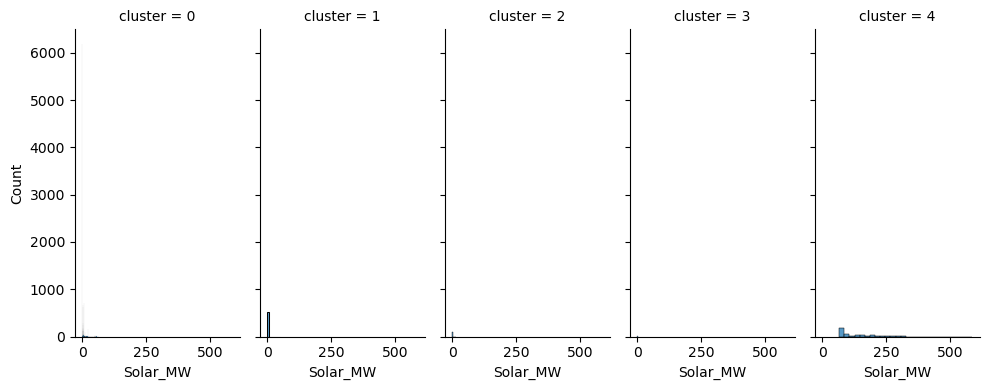

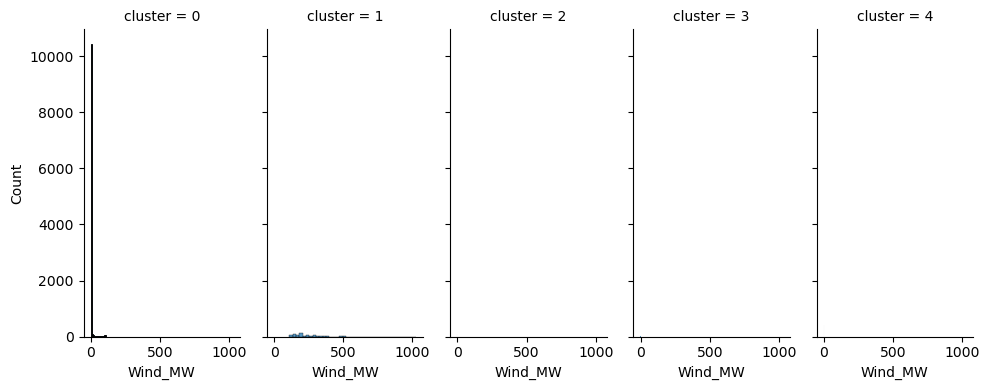

In [36]:
# Histograms for the features by cluster
for feature in ['Coal_MW', 'Hydro_MW', 'Solar_MW', 'Wind_MW']:
    g = sns.FacetGrid(df, col="cluster", height=4, aspect=.5)
    g = g.map(sns.histplot, feature)

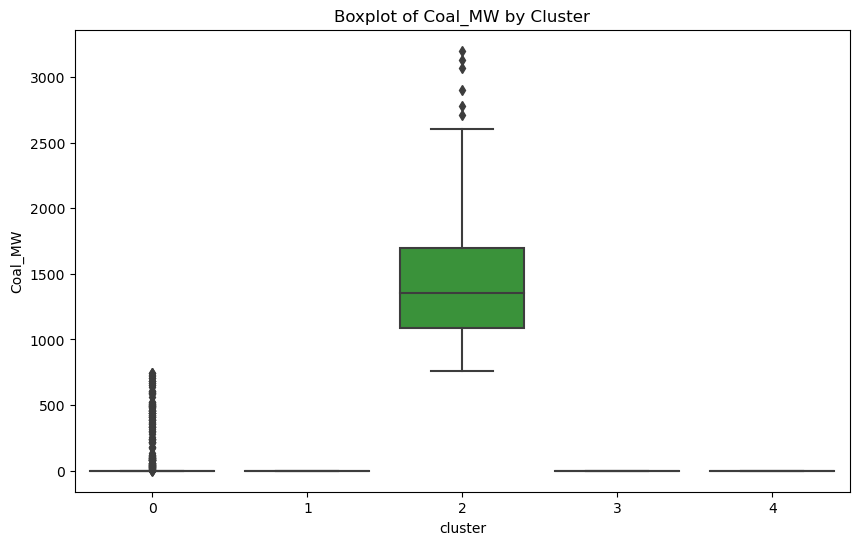

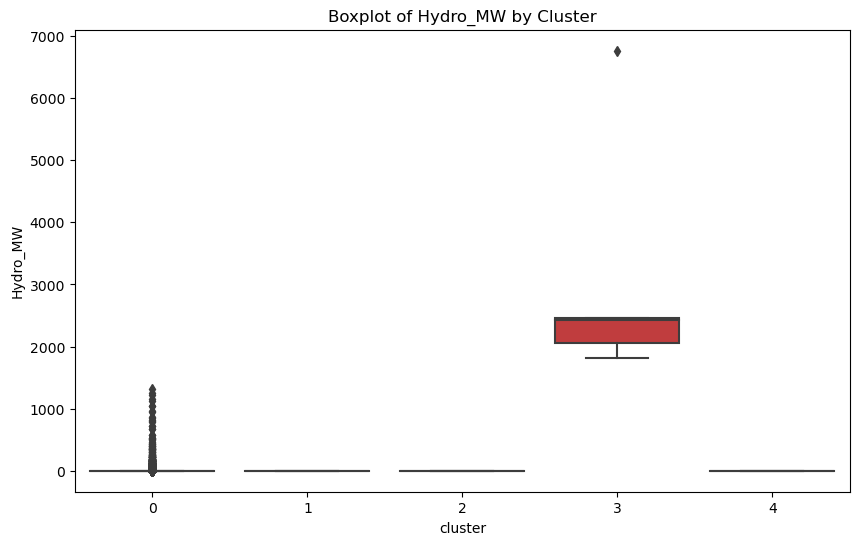

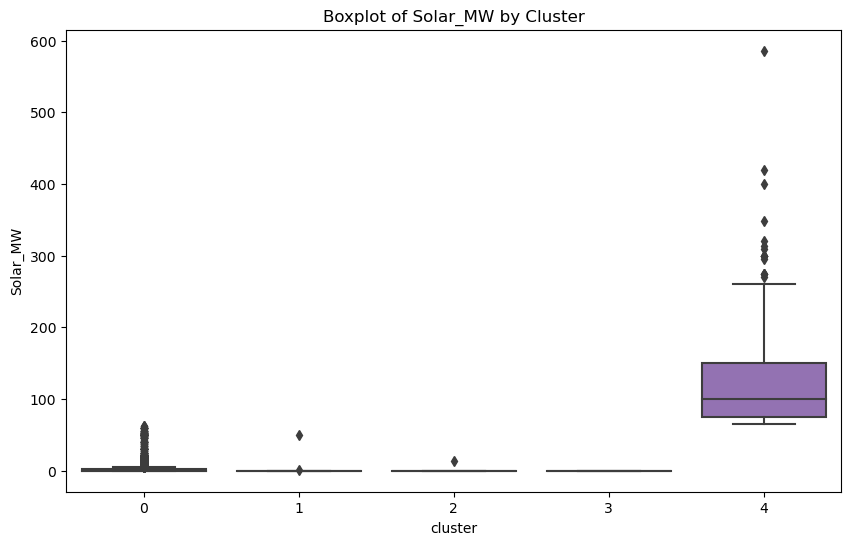

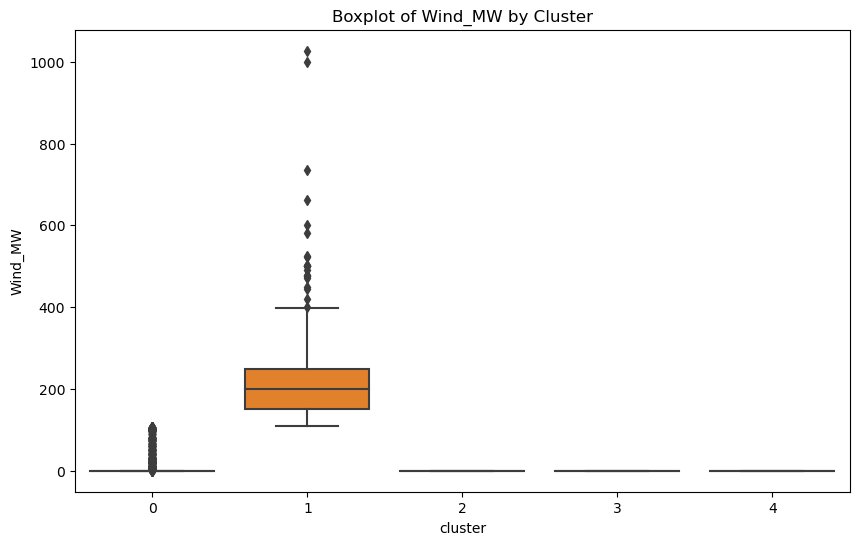

In [37]:
# Boxplots for the features by cluster
for feature in ['Coal_MW', 'Hydro_MW', 'Solar_MW', 'Wind_MW']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'